<a href="https://colab.research.google.com/github/ArshockAbedan/scikit-learn/blob/main/ClassifierComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [5]:
h = 0.02 # step size in the mesh

names = [
         "Nearest Neighbors",
         "Linear SVM",
         "RBF SVM",
         "Gaussian process",
         "Decision Tree",
         "Random Forest",
         "Neural Net",
         "AdaBoost",
         "Naive Bayes",
         "QDA",
]

classifiers = [
               KNeighborsClassifier(3),
               SVC(kernel="linear", C=0.025),
               SVC(gamma=2, C=1),
               GaussianProcessClassifier(1.0 * RBF(1.0)),
               DecisionTreeClassifier(max_depth=5),
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
               MLPClassifier(alpha=1, max_iter=1000),
               AdaBoostClassifier(),
               GaussianNB(),
               QuadraticDiscriminantAnalysis(),
]

In [21]:
X, y = make_classification(n_features=2, n_redundant=0,
                           n_informative=2, random_state=1,
                           n_clusters_per_class=1)

In [22]:
X

array([[-1.04948638,  0.8786438 ],
       [ 0.8780991 ,  0.89551051],
       [ 0.95928819,  1.03967316],
       [-1.18013412,  1.12062155],
       [-0.90731836,  1.06040861],
       [-0.62754626,  1.37661405],
       [ 0.82178321,  1.18947778],
       [-1.20376927,  0.78801845],
       [ 0.77151441,  0.345716  ],
       [-0.493857  ,  1.66752297],
       [ 1.17456965,  0.69211449],
       [ 0.82798737,  0.84806927],
       [ 0.89189141,  0.87699465],
       [ 0.90394545,  0.35413361],
       [ 0.94459507,  1.12641981],
       [ 0.9317172 ,  0.78344054],
       [-0.96853969,  1.27991386],
       [-1.09230828,  0.92686981],
       [-0.68243019,  1.4468218 ],
       [-0.76045809,  0.61363671],
       [-1.1146902 ,  1.13545112],
       [ 1.32970299,  1.58463774],
       [-1.39003042,  0.85771953],
       [ 1.01313574,  1.16777676],
       [ 1.22382712,  1.98519313],
       [-1.20257258,  0.69174373],
       [ 0.96435056,  1.77547698],
       [ 1.02600767,  0.87226739],
       [ 1.10863359,

In [23]:
rng = np.random.RandomState(2)

In [24]:
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X,y)

In [25]:
linearly_separable

(array([[-0.17749658,  0.93049627],
        [ 1.97742406,  1.76615529],
        [ 1.80002379,  1.7003428 ],
        [-0.77083686,  2.35916348],
        [-0.30800901,  1.59406316],
        [ 0.61472141,  2.43489824],
        [ 1.0909431 ,  2.21663402],
        [-0.83488954,  2.35868875],
        [ 2.47946499,  1.33418967],
        [ 1.19926597,  1.82681392],
        [ 2.18506184,  0.8226875 ],
        [ 1.68423203,  1.0411311 ],
        [ 1.14621135,  2.07048527],
        [ 1.35596945,  0.56802498],
        [ 1.38520748,  1.82607238],
        [ 1.86729217,  1.18692699],
        [ 0.31227376,  2.24605353],
        [-0.08183484,  1.70065511],
        [ 0.90484472,  2.60683016],
        [-0.4358609 ,  2.0151414 ],
        [ 0.81441196,  2.13546784],
        [ 3.10874312,  2.26786504],
        [-0.25574217,  1.71281146],
        [ 1.88663027,  2.72089513],
        [ 2.29503547,  3.89267759],
        [-0.11415626,  0.85593357],
        [ 1.69703537,  3.47717799],
        [ 1.83855775,  0.926

In [26]:
datasets = [
            make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
]

In [46]:
header_fontsize = 30

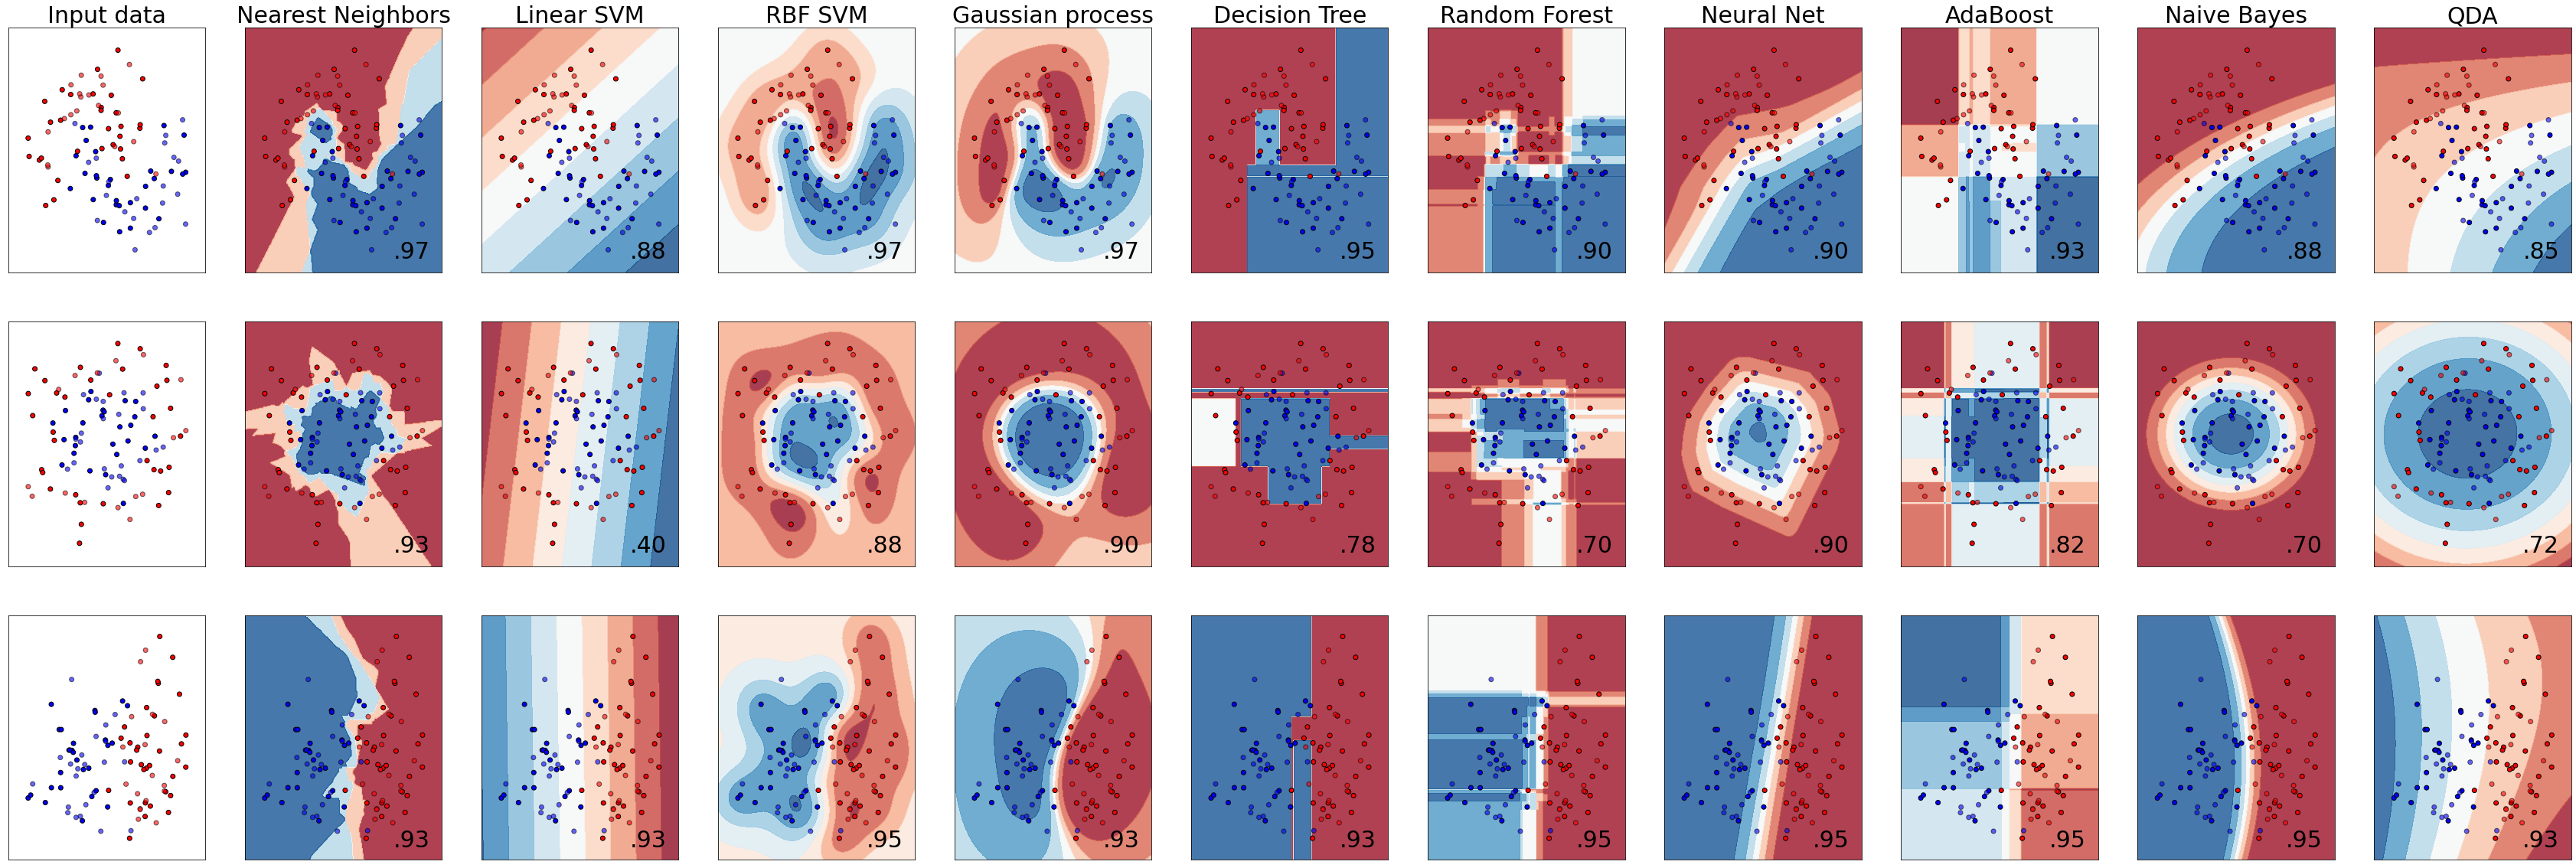

In [48]:
figure = plt.figure(figsize=(60,20))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
  # preporcess dataset, split into training and test part
  X, y = ds
  X = StandardScaler().fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.4, random_state=42
  )
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Just plot the dataset first
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(["#FF0000", "#0000FF"])
  ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
  if ds_cnt == 0:
    ax.set_title("Input data", {'fontsize': header_fontsize} )
  # Plot the trainig points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="K")
  # Plot the testing points
  ax.scatter(
      X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
  )
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  i += 1

  # iterate over classifiers
  for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

    # Plot the training points
    ax.scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
    )
    # Plot the testing points
    ax.scatter(
        X_test[:, 0],
        X_test[:, 1],
        c=y_test,
        cmap=cm_bright,
        edgecolors="k",
        alpha=0.6,
    )

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name, {'fontsize': header_fontsize} )
    ax.text(
        xx.max() - 0.3,
        yy.min() + 0.3,
        ("%.2f" % score).lstrip("0"),
        size=30,
        horizontalalignment="right",
    )
    i += 1

# plt.tight_layout()
plt.show()
